# Full Name:  Çağdaş Güven


# Student ID: 2738938

# Find words of certain patterns: Scrabble with ME536 flavor
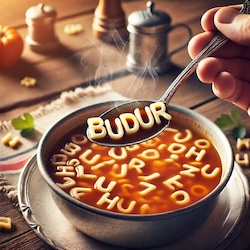


# as usual, start with imports

You are not allowed to import additional libraries, but you can import other sub-libraries for conveinence

In [1]:
# import usual suspects
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as pimg # check this out this is new
from numpy import cos, arccos, sin, pi, round
from numpy.linalg import matrix_rank as rank
from numpy.linalg import svd, eig
from scipy.linalg import orth
from scipy.ndimage import convolve
import cv2 as cv
from skimage import io
from skimage.filters import threshold_otsu as otsu
from PIL import Image, ImageDraw, ImageFont
from PIL import Image # if needed more can be importaed
import sklearn as skl # famous sci-kit learn
import skimage as ski # equally famous sci-kit image
!rm bug_numpy_utils.py 2>/dev/null  # at the first run file does not exits but error should print
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint, CData, text2mat # note that once these files are downloaded you can read their content.
from bug_numpy_utils import DrawOnImage as DrawIt
!rm me536utils.py 2>/dev/null  # at the first run file does not exits but error should print
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/me536utils.py
from me536utils import RotMat

# my imports
from scipy.spatial import ConvexHull
from skimage.measure import label, regionprops

--2024-12-23 17:42:15--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18456 (18K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  18.02K  --.-KB/s    in 0s      

2024-12-23 17:42:15 (113 MB/s) - ‘bug_numpy_utils.py’ saved [18456/18456]

--2024-12-23 17:42:15--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/me536utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3130 (3.1K)

## Let's get started with generating a test image
Test images to functions you will write can be generated using the following code.  

Some of the paramters will not change, yet play with the changable parameters to see what kind of different images can be generated with it.  

Note that at the end a __box__ and a __line__ is also drawn on the image to demonstrate the usage of already provided (imported) function: ```DrawIt()```.

So all utilities are already provided, so that you can focus on the tast itself!

In [2]:
# in the assignment assessment following will not change in test images
fontname = '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf'
cellSize = 30 #cell within which a single char will be printed
BackColor = (255,255, 255) # back color
ForeColor = (0, 0, 0) # font color

charz = ['B', 'U', 'D', 'R', 'K', 'A', 'E', '6', 'N']
#charz = ['R' ]
# in the assignment assessment variable above will not change in generating test images

# CHANGABLE PARAMETER
xCount, yCount = 15, 10 # number of cells

# prompt: generate a list that is 10 by 15 that that contains * in each element
charmap = [['' for i in range(xCount)] for j in range(yCount)] # assign
# '''
# The following is to be used in generating the resulting image in your function
# Note that you will need more colors, and location of lines and boxes will be determined by your function
# '''
# # generate 2 sample pens
# penRed = (255,0, 0)
# penGreen = (0,255,0)

# # a green box with no diagonals
# img = DrawIt(img, ((90, 90),(120, 120)), box=True, diagonals = False, dpen=penGreen)
# # finally a blue line
# img = DrawIt(img, ((30, 30),(105, 105)), dpen = penRed)



# # finally plot the image
# plt.figure(figsize=(12,9))
# plt.imshow(img)

# CHANGABLE PARAMETER
numLetters = 1500 #well obvious

# CHANGABLE PARAMETER
fixedFontSize = False #if variable font size will be used

fR = 0.8 # font ratio to cell size
fontsize = int(cellSize * fR) # fixed font size
nB = int(cellSize*(1-fR)) # location noise

img = Image.new('RGB', (xCount*cellSize,yCount*cellSize), BackColor ) # blank image
imgPen = ImageDraw.Draw(img) # pen to draw on the blank image

pos = [] # keep track of occupied cells
for i in range(numLetters): # draw each letter if random location is not already occupied, if occupied, skip
    if not fixedFontSize: # if set so, select a random font size
        fontsize = np.random.randint(12, cellSize-1)
        dx, dy = 0, 0 # when scaled, position does not change
    else: # add some location noise
        dx = int(np.random.rand()* nB)
        dy = int(np.random.rand()* nB)
    font = ImageFont.truetype(fontname, fontsize) # font instace created
    txt = random.choice(charz)
    x = np.random.randint(0, xCount)
    y = np.random.randint(0, yCount)
    if (x,y) not in pos:
        imgPen.text((x * cellSize + dx, y * cellSize + dy), txt, font=font, fill=ForeColor) # write the character to blank image
        pos.append((x,y))

img = np.array(img) # convert PIL image to numpy for future numpy stuff, this is what I will pass to your function



# '''
# The following is to be used in generating the resulting image in your function
# Note that you will need more colors, and location of lines and boxes will be determined by your function
# '''
# # generate 2 sample pens
# penRed = (255,0, 0)
# penGreen = (0,255,0)

# # a green box with no diagonals
# img = DrawIt(img, ((90, 90),(120, 120)), box=True, diagonals = False, dpen=penGreen)
# # finally a blue line
# img = DrawIt(img, ((30, 30),(105, 105)), dpen = penRed)



# # finally plot the image
# plt.figure(figsize=(12,9))
# plt.imshow(img)


# Your assignment starts here

You are to write 1 function to which an image generated by the code above will be passed along with one of the following words: "KARE", "BUDUR" and "6KENAR".  
Note that all letters will be upper case.  

The stub of the function you are to complete is given below.  

If **KARE** is pased, your function at the end should:  
- Change the colors (i.e. 4 different colors in total) of all the letters in "KARE" for all instances of letters 'K', 'A', 'R' and 'E' so that we can see that your algorithm was able to find all relevant letters.
- Select the 4 letters 'K', 'A', 'R' and 'E' in a row, draw a fixed colored box around the selected letters and connect their centers with lines, so that when you follow the letters from 'K' to 'E' it should look like the best possible square within the given image. When connecting letters, finally connect 'E' to 'K' so that it properly looks like a polygon.

If **BUDUR** is passed, your function should:
- Similarly, change the colors (i.e. 5 differen colors in total) of all letters in "BUDUR" for all instances of 'B', 'U', 'D', 'U' and 'R'.  
- This time, you are trying to find the shortest path that connects the letters of the word "BUDUR". Once sequence is found, similarly put a colored box around all 6 letters and connect them with lines from 'B' all the way to 'R'.  Do not connect 'R' back to 'B', since this is a path.

If **6KENAR** is passed, your function should:
- Well, same deal goes on, change the colors of (i.e. 6 differen colors in total) of all '6', 'K', 'E', 'N', 'A' and 'R' for the same reason as above.
- Select the characters in such a way that, after placing 6 colored boxed and drawing 6 lines as define above, when the centers of the boxes from '6' all the way to 'R' and back to '6' are connected, it should be the largest possile 6 sided [convex polygon](https://mathworld.wolfram.com/ConvexPolygon.html) (irregular convex hexagon) within the given image. In other words, you are not looking for a perfect, i.e. equilateral hexagon, but any convex 6 sided polygon with the largest area is what you are looking for.

Note that in all of the above cases, letters should be sorted. For example if the solution is given for 'BUDUR', Starting from letter 'B' if we follow the lines one after the other, we shoul visit 'U', 'D', 'U' and 'R'. The others are similar. So order matters!!!

Also note that for 'KARE' and '6KENAR' I expect you to explain clearly what measure you use and how you select the best fitting alternative.

If the passes string cannot be formed using the letters in the passed image (for example assume that letter 'E', does not exist at all, and passes text is "6KENAR"), then your code should seperately color all remaining letters in the image, i.e. all '6', 'K', 'N', 'A' and 'R' letters should be colored, different letters, different colors, same letters same color.

You are expected to fill in the ```SearchInAlphabetSoup()``` function, yet you can write as many support functions you like below, but at the end please put all your code in **ONE CODE CELL** so that we can start testing your code after running only the following cell.

## Explanation of how to solve 'KARE' case:  



## Explanation of how to solve the '6KENAR' case:  



In [3]:
# all of your support code in this box... in case needed

# Helper function to draw boxes and connect centers



In [4]:
def SearchInAlphabetSoup(img, txt="KARE"):
    """
    Search for characters in an image and map them to the given text (txt).
    
    Args:
        img (ndarray): Input image in RGB format.
        txt (str): Target word (e.g., 'KARE').
    
    Returns:
        result (ndarray): Image with detected letters highlighted in specific colors.
        addresses (dict): Dictionary of addresses for each letter in the given text.
    """
    # Constants
    fontname = '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf'
    cellSize = 30  # Size of each cell in the image grid
    colors = {ch: tuple(np.random.randint(0, 256, 3).tolist()) for ch in txt}
    addresses = {ch: [] for ch in txt}
    
    # Create character templates
    templates = {}
    fontsize = int(cellSize * 0.8)  # 80% of cell size for font
    for char in charz:
        font = ImageFont.truetype(fontname, fontsize)
        char_img = Image.new("RGB", (cellSize, cellSize), BackColor)
        draw = ImageDraw.Draw(char_img)
        draw.text((5, 5), char, font=font, fill=ForeColor)  # Draw slightly inset
        templates[char] = np.array(char_img.convert("L"))  # Convert to grayscale
    
    # Convert input image to grayscale and threshold it
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    _, binary = cv.threshold(gray, 128, 255, cv.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    print(f"Total contours detected: {len(contours)}")
    
    # Initialize result image
    result = img.copy()
    
    for i, contour in enumerate(contours):
        x, y, w, h = cv.boundingRect(contour)
        if w > cellSize or h > cellSize:  # Skip if contour exceeds cell size
            continue

        # Extract and resize the detected region
        char_img = binary[y:y+h, x:x+w]
        resized_char = cv.resize(char_img, (cellSize, cellSize), interpolation=cv.INTER_AREA)

        # Match against templates
        detected_char = None
        max_score = 0
        for char, template in templates.items():
            # Measure similarity (e.g., using normalized cross-correlation)
            score = np.sum(resized_char == template) / (cellSize * cellSize)
            if score > max_score and score > 0.7:  # Set a threshold for matching
                detected_char = char
                max_score = score

        print(f"Contour {i}: Bounding box = (x={x}, y={y}, w={w}, h={h}), Detected character = {detected_char}")

        if detected_char is not None and detected_char in txt:  # Check if detected_char is valid
            # Map character to the corresponding color
            color = colors[detected_char]
            cv.rectangle(result, (x, y), (x + w, y + h), color, -1)
            # Store address
            addresses[detected_char].append((x // cellSize, y // cellSize))



## A sample test

In [3]:
def DrawSquareFromText_NoCollision_WithBoxes(img, txt, addresses, cell_size=30):
    """
    Draw a square connecting the centers of the cells containing the characters in the given text,
    ensuring angles are close to 90 degrees and edges do not collide.
    Additionally, draw a box around the chosen cells and change the color of chosen letters to orange.

    Args:
        img (ndarray): Input image.
        txt (str): Text to draw the square for (e.g., "KARE").
        addresses (dict): Dictionary of detected letter addresses.
        cell_size (int): Size of each cell in the grid.

    Returns:
        img_with_square (ndarray): Image with the square drawn.
    """
    import numpy as np

    # Helper function to calculate cell center
    def get_cell_center(cell):
        return (cell[1] * cell_size + cell_size // 2, cell[0] * cell_size + cell_size // 2)

    # Helper function to check edge intersection
    def edges_intersect(p1, p2, q1, q2):
        def ccw(a, b, c):
            return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])
        
        return ccw(p1, q1, q2) != ccw(p2, q1, q2) and ccw(p1, p2, q1) != ccw(p1, p2, q2)

    # Extract centers for each character in the text
    centers = {char: [get_cell_center(cell) for cell in addresses[char]] for char in txt}

    # If any character is not detected, return the original image
    if any(len(centers[char]) == 0 for char in txt):
        print(f"Error: One or more characters in {txt} are not detected.")
        return img

    # Find the best configuration of cell centers that form a square
    best_square = None
    best_score = float('inf')

    for k_center in centers[txt[0]]:
        for a_center in centers[txt[1]]:
            for r_center in centers[txt[2]]:
                for e_center in centers[txt[3]]:
                    # Calculate angles for all corners
                    angle_k = calculate_angle(e_center, k_center, a_center)
                    angle_a = calculate_angle(k_center, a_center, r_center)
                    angle_r = calculate_angle(a_center, r_center, e_center)
                    angle_e = calculate_angle(r_center, e_center, k_center)

                    # Check for edge collisions
                    if edges_intersect(k_center, a_center, r_center, e_center):
                        continue
                    if edges_intersect(a_center, r_center, e_center, k_center):
                        continue

                    # Check if angles are close to 90 degrees and similar to each other
                    angles = [angle_k, angle_a, angle_r, angle_e]
                    mean_angle = np.mean(angles)
                    angle_deviation = np.std(angles)  # Variation between angles
                    score = abs(mean_angle - 90) + angle_deviation

                    if score < best_score:
                        best_score = score
                        best_square = (k_center, a_center, r_center, e_center)

    if best_square:
        # Draw the square and highlight chosen cells
        img_with_square = img.copy()

        # Draw the square
        img_with_square = DrawIt(img_with_square, (best_square[0], best_square[1]), box=False, diagonals=False, dpen=(255, 0, 0))
        img_with_square = DrawIt(img_with_square, (best_square[1], best_square[2]), box=False, diagonals=False, dpen=(0, 255, 0))
        img_with_square = DrawIt(img_with_square, (best_square[2], best_square[3]), box=False, diagonals=False, dpen=(0, 0, 255))
        img_with_square = DrawIt(img_with_square, (best_square[3], best_square[0]), box=False, diagonals=False, dpen=(255, 255, 0))

        # Highlight the selected cells and color the letters
        for center in best_square:
            # Calculate the bounding box for the current cell
            top_left = (center[0] - cell_size // 2, center[1] - cell_size // 2)
            bottom_right = (center[0] + cell_size // 2, center[1] + cell_size // 2)

            # Ensure the coordinates are within the image bounds
            top_left = (max(0, top_left[1]), max(0, top_left[0]))
            bottom_right = (min(img_with_square.shape[1] - 1, bottom_right[1]), min(img_with_square.shape[0] - 1, bottom_right[0]))

            # Draw the box around the cell
            box_coords = (top_left[::-1], bottom_right[::-1])
            img_with_square = DrawIt(img_with_square, box_coords, box=True, diagonals=False, dpen=(0, 165, 255))

            # Apply the orange mask for the letter region
            cell_region = img_with_square[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
            gray_cell = cv.cvtColor(cell_region, cv.COLOR_BGR2GRAY)
            _, binary_cell = cv.threshold(gray_cell, 240, 255, cv.THRESH_BINARY_INV)  # Extract non-white regions

            # Find contours in the binary cell region
            contours, _ = cv.findContours(binary_cell, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                cv.drawContours(cell_region, [contour], -1, (0, 165, 255), thickness=cv.FILLED)

        return img_with_square

    print("No valid square configuration found.")
    return img


def calculate_angle(p1, p2, p3):
    """
    Calculate the angle formed by three points (p1 -> p2 -> p3).

    Args:
        p1, p2, p3 (tuple): Points as (x, y).

    Returns:
        angle (float): Angle in degrees.
    """
    import numpy as np

    # Vectors
    v1 = np.array([p1[0] - p2[0], p1[1] - p2[1]])
    v2 = np.array([p3[0] - p2[0], p3[1] - p2[1]])

    # Calculate the angle
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip for numerical stability
    return np.degrees(angle)




In [4]:
def FindShortestPath(img, txt, addresses, cell_size=30):
    """
    Find the shortest path connecting the letters in the given text in the specified order.
    Args:
        img (ndarray): Input image.
        txt (str): Text to find the shortest path for (e.g., "BUDUR").
        addresses (dict): Dictionary of detected letter addresses.
        cell_size (int): Size of each cell in the grid.

    Returns:
        img_with_path (ndarray): Image with the shortest path drawn.
    """

    # Helper function to calculate the Euclidean distance between two cells
    def euclidean_distance(cell1, cell2):
        x1, y1 = cell1
        x2, y2 = cell2
        return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    # Helper function to calculate cell center
    def get_cell_center(cell):
        return (cell[1] * cell_size + cell_size // 2, cell[0] * cell_size + cell_size // 2)
    # Helper function to check edge intersection
    def edges_intersect(p1, p2, q1, q2):
        def ccw(a, b, c):
            return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])

        return ccw(p1, q1, q2) != ccw(p2, q1, q2) and ccw(p1, p2, q1) != ccw(p1, p2, q2)

    # Initialize variables
    img_with_path = img.copy()
    img_height, img_width = img.shape[:2]
    current_position = None
    path = []
    visited = set()

    for char in txt:
        # Check if the character has any detected positions
        if not addresses[char]:
            print(f"Error: Character {char} not detected.")
            return img

        # Calculate distances to all unvisited nodes of the current character
        if current_position is None:
            # Starting position
            closest_cell = min(addresses[char], key=lambda cell: 0)  # Select any starting point
        else:
            valid_cells = [
                cell
                for cell in addresses[char]
                if cell not in visited
                and not any(
                    edges_intersect(
                        get_cell_center(current_position),
                        get_cell_center(cell),
                        get_cell_center(path[i]),
                        get_cell_center(path[i + 1]),
                    )
                    for i in range(len(path) - 1)
                )
            ]
            if not valid_cells:
                print(f"No valid path found for character {char}.")
                return img

            closest_cell = min(valid_cells, key=lambda cell: euclidean_distance(current_position, cell))

         # Add the closest cell to the path
        path.append(closest_cell)
        visited.add(closest_cell)
        current_position = closest_cell

    # Draw the path
    for i in range(len(path) - 1):
        start = get_cell_center(path[i])
        end = get_cell_center(path[i + 1])
        img_with_path = DrawIt(img_with_path, (start, end), box=False, diagonals=False, dpen=(0, 255, 0))

    # Highlight the chosen cells
    for cell in path:
        top_left = (cell[1] * (cell_size), cell[0] * (cell_size))
        bottom_right = ((cell[1] + 1) * (cell_size), (cell[0] + 1) * (cell_size))
        # Ensure the coordinates are within the image bounds
        top_left = (max(0, top_left[1]), max(0, top_left[0]))
        bottom_right = (min(img_with_path.shape[1] - 1, bottom_right[1]), min(img_with_path.shape[0] - 1, bottom_right[0]))
        # Clip coordinates to image dimensions
        top_left = (max(0, min(top_left[0], img_width - 1)), max(0, min(top_left[1], img_height - 1)))
        bottom_right = (max(0, min(bottom_right[0], img_width - 1)), max(0, min(bottom_right[1], img_height - 1)))

        # Draw the box
        box_coords = (top_left[::-1], bottom_right[::-1])
        img_with_path = DrawIt(img_with_path, box_coords, box=True, diagonals=False, dpen=(255, 0, 0))

        # Apply the orange mask for the letter region
        cell_region = img_with_path[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
        gray_cell = cv.cvtColor(cell_region, cv.COLOR_BGR2GRAY)
        _, binary_cell = cv.threshold(gray_cell, 240, 255, cv.THRESH_BINARY_INV)  # Extract non-white regions

        # Find contours in the binary cell region
        contours, _ = cv.findContours(binary_cell, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            cv.drawContours(cell_region, [contour], -1, (0, 165, 255), thickness=cv.FILLED)

    return img_with_path


In [5]:
def BiggestHexagon(img, txt, addresses, cell_size=30):
    """
    Create the largest convex hexagon connecting the centers of the cells containing the characters in the given text,
    ensuring edges do not collide and the polygon is convex.

    Args:
        img (ndarray): Input image.
        txt (str): Text to form the hexagon (e.g., "6KENAR").
        addresses (dict): Dictionary of detected letter addresses.
        cell_size (int): Size of each cell in the grid.

    Returns:
        img_with_hexagon (ndarray): Image with the hexagon drawn.
    """
    import numpy as np
    from itertools import permutations

    # Helper function to calculate cell center
    def get_cell_center(cell):
        return (cell[1] * cell_size + cell_size // 2, cell[0] * cell_size + cell_size // 2)

    # Helper function to calculate the area of a polygon
    def polygon_area(vertices):
        x, y = zip(*vertices)
        return 0.5 * abs(sum(x[i] * y[i + 1] - y[i] * x[i + 1] for i in range(-1, len(vertices) - 1)))

    # Helper function to check if a polygon is convex
    def is_convex(vertices):
        def cross_product(o, a, b):
            return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

        signs = [cross_product(vertices[i], vertices[(i + 1) % len(vertices)], vertices[(i + 2) % len(vertices)]) for i in range(len(vertices))]
        return all(s >= 0 for s in signs) or all(s <= 0 for s in signs)

    # Helper function to check edge intersection
    def edges_intersect(p1, p2, q1, q2):
        def ccw(a, b, c):
            return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])
        
        return ccw(p1, q1, q2) != ccw(p2, q1, q2) and ccw(p1, p2, q1) != ccw(p1, p2, q2)

    # Extract centers for each character in the text
    centers = {char: [get_cell_center(cell) for cell in addresses[char]] for char in txt}

    # If any character is not detected, return the original image
    if any(len(centers[char]) == 0 for char in txt):
        print(f"Error: One or more characters in {txt} are not detected.")
        return img

    # Generate all permutations of the hexagon vertices
    candidates = [
        (six, k, e, n, a, r)
        for six in centers[txt[0]]
        for k in centers[txt[1]]
        for e in centers[txt[2]]
        for n in centers[txt[3]]
        for a in centers[txt[4]]
        for r in centers[txt[5]]
    ]

    # Find the largest convex hexagon
    best_hexagon = None
    max_area = 0

    for hexagon in candidates:
        # Check if the polygon is convex
        if not is_convex(hexagon):
            continue

        # Check for edge collisions
        collision = False
        for i in range(len(hexagon)):
            for j in range(i + 1, len(hexagon)):
                if edges_intersect(hexagon[i], hexagon[(i + 1) % len(hexagon)], hexagon[j], hexagon[(j + 1) % len(hexagon)]):
                    collision = True
                    break
            if collision:
                break

        if collision:
            continue

        # Calculate the area of the hexagon
        area = polygon_area(hexagon)
        if area > max_area:
            max_area = area
            best_hexagon = hexagon

    if best_hexagon:
        # Draw the hexagon and highlight chosen cells
        img_with_hexagon = img.copy()

        # Draw the edges of the hexagon
        for i in range(len(best_hexagon)):
            img_with_hexagon = DrawIt(
                img_with_hexagon,
                (best_hexagon[i], best_hexagon[(i + 1) % len(best_hexagon)]),
                box=False,
                diagonals=False,
                dpen=(255, 0, 255),
            )

        # Highlight the chosen cells and change the colors of the letters
        for center in best_hexagon:
            # Calculate the bounding box for the current cell
            top_left = (center[0] - cell_size // 2, center[1] - cell_size // 2)
            bottom_right = (center[0] + cell_size // 2, center[1] + cell_size // 2)

            # Ensure the coordinates are within the image bounds
            top_left = (max(0, top_left[1]), max(0, top_left[0]))
            bottom_right = (
                min(img_with_hexagon.shape[1] - 1, bottom_right[1]),
                min(img_with_hexagon.shape[0] - 1, bottom_right[0]),
            )

            # Draw the box around the cell
            box_coords = (top_left[::-1], bottom_right[::-1])
            img_with_hexagon = DrawIt(
                img_with_hexagon, box_coords, box=True, diagonals=False, dpen=(0, 255, 255)
            )

            # Apply the orange mask for the letter region
            cell_region = img_with_hexagon[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
            gray_cell = cv.cvtColor(cell_region, cv.COLOR_BGR2GRAY)
            _, binary_cell = cv.threshold(gray_cell, 240, 255, cv.THRESH_BINARY_INV)  # Extract non-white regions

            # Find contours in the binary cell region
            contours, _ = cv.findContours(binary_cell, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                cv.drawContours(cell_region, [contour], -1, (0, 165, 255), thickness=cv.FILLED)

        return img_with_hexagon


    print("No valid hexagon configuration found.")
    return img


In [6]:
def SearchInAlphabetSoup_Hu_Color(img, txt='KARE'):
    """
    Search for letters in the given image based on Hu moments and color them using multiple reference moments.
    Args:
        img (ndarray): Input image.
        txt (str): Word to search for in the image.
        reference_hu_moments (dict): Dictionary containing multiple Hu moment references for each character.
    Returns:
        result (ndarray): Processed image with detected letters colored.
        addresses (dict): Dictionary of detected letter addresses.
    """
    import cv2 as cv
    import numpy as np

    # Reference Hu moments for known characters (if not provided externally)
    reference_hu_moments=None

    if reference_hu_moments is None:
        reference_hu_moments = {
            'R': [
            [2.99337424, 7.37441974, 11.49610793, 11.15684756, -12., 11.99959664, -12.],
            [2.99819389, 7.18990667, 11.37563441, 11.15438167, 12., 11.99955274, -12.],
            [3.00293021, 7.23328647, 11.60703302, 11.20708134, -12., 11.99949215, -12.],
            [3.02180598, 7.49264423, 11.06654149, 11.05402679, 12., 11.99981334, -12.],
            [2.95856174, 7.2228826, 11.19475844, 11.13353714, -12., 11.99933721, -12.],
            [3.02180598, 7.49264423, 11.06654149, 11.05402679, 12., 11.99981334, -12.],
            [2.97116618, 7.05089972, 10.90547477, 10.88396242, 12., 11.99870308, -12.],
            [2.98172651, 7.44007234, 11.43527447, 10.98473779, 12., 11.99947495, -12.],
            [2.97116618, 7.05089972, 10.90547477, 10.88396242, 12., 11.99870308, -12.],
            [2.9861125, 7.22016021, 11.15788965, 11.20814166, 12., 11.99979985, -12.]
    ],
            'B': [
            [3.00640564, 7.17381556, 10.98021093, 11.86583584, -12., 11.99996283, 12.],
            [2.9731605, 6.94182847, 11.02548256, 11.78251691, -12., 11.99990488, 12.],
            [2.99780934, 7.01905498, 11.07342144, 11.90761205, -12., 11.99996904, 12.],
            [2.98469476, 7.05281015, 10.80878881, 11.9772553, -12., -11.99999372, -12.],
            [2.99330435, 7.01698556, 10.82322186, 11.75383154, 12., 11.9999893, -12.],
            [2.99330435, 7.01698556, 10.82322186, 11.75383154, 12., 11.9999893, -12.],
            [3.0192444, 7.4303944, 10.9420488, 11.68960313, 12., -11.99991294, 12.],
            [3.01209861, 7.02534156, 10.91654653, 11.84651875, 12., 11.99998056, 12.],
            [3.0041089, 7.20432312, 10.91756631, 11.84952106, -12., 11.99996271, -12.],
            [2.98051719, 7.22155248, 10.93982636, 11.49273447, -12., 11.99996089, -12.]
    ],
            'U': [
            [2.9161667, 7.31809027, 10.24799455, 10.8103928, -12., 11.99862494, -12.],
            [2.9161667, 7.31809027, 10.24799455, 10.8103928, -12., 11.99862494, -12.],
            [2.9161667, 7.31809027, 10.24799455, 10.8103928, -12., 11.99862494, -12.],
            [2.94840854, 7.64026168, 10.13563288, 10.7562245, -12., 11.99964574, 12.],
            [2.93660685, 7.30327783, 10.27246636, 10.68193869, 12., 11.99970407, 12.],
            [2.91076294, 7.20722672, 10.17176905, 10.64430474, -12., 11.99766965, -12.],
            [2.93318599, 7.03895723, 10.39722718, 10.80500237, -12., 11.99906914, -12.],
            [2.91076294, 7.20722672, 10.17176905, 10.64430474, -12., 11.99766965, -12.],
            [2.91076294, 7.20722672, 10.17176905, 10.64430474, -12., 11.99766965, -12.],
            [2.9497132, 7.13331803, 10.36393817, 11.14940597, -12., 11.99928372, -12.]
    ],
            'D': [
            [2.9084599, 6.96149022, 10.0521984, 11.30194296, -12., -11.99944716, -12.],
            [2.95753146, 7.01708874, 10.22160862, 11.46446138, -12., -11.99970016, 12.],
            [2.98530048, 7.13249677, 10.36855768, 11.82979516, 12., -11.99994343, 0.],
            [2.98530048, 7.13249677, 10.36855768, 11.82979516, 12., -11.99994343, 0.],
            [2.98530048, 7.13249677, 10.36855768, 11.82979516, 12., -11.99994343, 0.],
            [2.94111029, 7.12690735, 10.19089953, 11.87114148, 12., 11.99998115, -12.],
            [2.92340801, 6.86960773, 10.131772, 11.60386621, -12., -11.99976977, -12.],
            [2.92340801, 6.86960773, 10.131772, 11.60386621, -12., -11.99976977, -12.],
            [2.98932668, 7.20351484, 10.30523049, 11.88963167, -12., -11.99996856, -12.],
            [2.95644284, 7.15427152, 10.15573452, 11.979795, -12., 11.99999951, 12.]
    ],
            'K': [
            [2.97521928, 7.14191947, 10.33176639, 10.6614037, -12., -11.99765613, 12.],
            [2.97521928, 7.14191947, 10.33176639, 10.6614037, -12., -11.99765613, 12.],
            [2.97521928, 7.14191947, 10.33176639, 10.6614037, -12., -11.99765613, 12.],
            [3.00113588, 7.34264773, 10.59911877, 10.58052349, -12., -11.99769337, 12.],
            [2.95769602, 7.10405808, 10.02161954, 10.56740793, -12., -11.99702514, 12.],
            [2.97171965, 6.99304696, 10.26616856, 10.73675528, -12., -11.99764933, 12.],
            [3.00113588, 7.34264773, 10.59911877, 10.58052349, -12., -11.99769337, 12.],
            [2.96010755, 6.94906786, 10.11911532, 10.62768259, -12., -11.99672589, 12.],
            [2.95623471, 7.13358849, 10.4803107, 10.51900689, -12., -11.99672277, 12.],
            [3.00476809, 7.08902742, 10.60881822, 10.79691926, -12., -11.99817015, 12.]
    ],
     #aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


            'A': [
            [  2.96356354  , 7.27730944  , 9.15974507 , 11.1055351  ,-12. , 11.99932451 , 12.        ],
            [  2.96356354 ,  7.27730944  , 9.15974507 , 11.1055351 , -12. , 11.99932451 , 12.        ],
            [  2.96766208 ,  7.25726     , 9.20516206 , 11.23301135 ,-12. , 11.99950535 , 12.        ],
            [  2.9619816  ,  7.26473138  , 9.18647435 , 11.16697955 ,-12. , 11.99941747 , 12.        ],
            [  2.94737101  , 7.17711621  , 9.20230938 , 10.79720977 ,-12. , 11.99833304 , 12.        ],
            [  2.94737101  , 7.17711621  , 9.20230938  ,10.79720977 ,-12. , 11.99833304 , 12.        ],
            [  2.94737101 ,  7.17711621  , 9.20230938 , 10.79720977 ,-12. , 11.99833304 , 12.        ],
            [  2.9987038  ,  7.36524797  , 9.28425017 , 11.46253624 ,-12. , 11.99977935 ,-12.        ],
            [ 2.99393918 , 7.37770734 , 9.23595474, 11.01256409 ,12.    ,     11.99947822 ,12.       ],
            [  2.96838801  , 7.16479765   ,9.23708667  ,11.0499672  ,-12. , 11.9991497  , 12.        ]
    ],
            # eeeeeeeeeeeeeeeeeeeeeeeeee
            'E':[
            [  2.90148216  , 6.61715167  ,10.23203413  ,10.33271991 ,-12., -11.9913422  , 12.        ],
            [  2.88360097  , 6.53789444 , 10.18117267 , 10.4470292  ,-12., -11.99202422 , 12.        ],
            [  2.88360097  , 6.53789444 , 10.18117267 , 10.4470292  ,-12. ,-11.99202422 , 12.        ],
            [  2.92161068  , 6.70722686  ,10.37386024  ,10.218256   ,-12. ,-11.98870168 , 12.        ],
            [  2.92161068  , 6.70722686  ,10.37386024 , 10.218256   ,-12., -11.98870168 , 12.        ],
            [  2.94198556  , 6.61182409 , 10.50385861  ,10.7712946  ,-12., -11.99664396 , 12.        ],
            [  2.91151497  , 6.52036571 , 10.38315578 , 10.60248756 ,-12., -11.99516884 , 12.        ],
            [  2.9662122   , 6.80777323 , 10.6748405  , 10.55992069 ,-12. ,-11.99656509 , 12.        ],
            [  2.9662122   , 6.80777323 , 10.6748405  , 10.55992069 ,-12., -11.99656509 , 12.        ],
            [  2.89595023  , 6.58100526 , 10.28892046  ,10.28788065 ,-12. ,-11.99076072 , 12.        ]
    ],
            #6666666666666666
            '6':[
            [  3.00662985  , 7.03678979 , 10.88341013 , 11.63884984 ,-12. ,-11.99983661 , 12.        ],
            [  2.96963463  , 6.87361438 , 10.62602114 , 11.37079219, -12. ,-11.99965396 ,-12.        ],
            [  2.98219027  , 6.93772886 , 10.71097202 , 11.41980857 ,-12. ,-11.99963856 ,-12.        ],
            [  2.96963463  , 6.87361438 , 10.62602114  ,11.37079219 ,-12., -11.99965396 ,-12.        ],
            [  2.98225369  , 6.91208366 , 10.55408089  ,11.20067104 ,-12., -11.99963034 ,-12.        ],
            [  2.98225369  , 6.91208366 , 10.55408089 , 11.20067104 ,-12., -11.99963034 ,-12.        ],
            [  2.96963463  , 6.87361438 , 10.62602114 , 11.37079219 ,-12., -11.99965396 ,-12.        ],
            [  2.98596906  , 6.89468478 , 10.4988344   ,11.30320345 ,-12., -11.99969131 ,-12.        ],
            [  2.98596906  , 6.89468478 , 10.4988344  , 11.30320345, -12., -11.99969131 ,-12.        ],
            [  2.98001227  , 6.88787796 , 10.74909433 , 11.50636062 ,-12., -11.99967838 , 12.    ]
    ],
            # nnnnnnnnnnnnnnnnnnnnnnn
            'N':[
            [  2.98702975  , 7.16447196 , 11.99742085 , 11.99116862  ,12., -11.99999935 , 12.        ],
            [  2.99121239 ,  7.33051856,  11.96198954 , 11.84624536 , 12.,  11.99998375 , 12.        ],
            [  2.98702975 ,  7.16447196  ,11.99742085  ,11.99116862 , 12., -11.99999935 , 12.        ],
            [  2.98702975 ,  7.16447196  ,11.99742085 , 11.99116862  ,12. ,-11.99999935 , 12.        ],
            [  2.9972662  ,  7.15292041  ,11.29029402 , 11.58826937 ,-12., -11.99984397 , 12.        ],
            [  3.01294821  , 7.30971082 , 11.98604284  ,11.64804209 ,-12. , 11.99990164  ,12.        ],
            [  3.01294821  , 7.30971082 , 11.98604284 , 11.64804209 ,-12.,  11.99990164 , 12.        ],
            [  3.00836829  , 7.46660531  ,11.97909214 , 11.74086408 , 12. , 11.99993908 ,-12.        ],
            [  3.00836829  , 7.46660531  ,11.97909214  ,11.74086408 , 12. , 11.99993908 ,-12.        ],
            [  3.01294821  , 7.30971082 , 11.98604284  ,11.64804209 ,-12.  ,11.99990164 , 12.        ]
    ],
            # Repeat for other characters...
        }

     # Define colors for each character
    colors = {
        'K': (255, 0, 0),   # Red
        'A': (0, 255, 0),   # Green
        'R': (0, 0, 255),   # Blue
        'E': (255, 255, 0), # Yellow
        'B': (255, 0, 255), # Magenta
        'U': (0, 255, 255), # Cyan
        'D': (128, 0, 128), # Purple
        '6': (128, 128, 0), # Olive
        'N': (0, 128, 128)  # Teal
    }

    # Convert to grayscale and binary
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, binary = cv.threshold(gray, 128, 255, cv.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Initialize result image and addresses
    result = img.copy()
    addresses = {char: [] for char in txt}

    # Define cell size
    cellSize = 30
    threshold_margin = 1.5  # Adjust threshold for better detection

    print(f"Total contours detected: {len(contours)}")

    for i, contour in enumerate(contours):
        x, y, w, h = cv.boundingRect(contour)

        # Extract the ROI and calculate Hu moments
        roi = binary[y:y + h, x:x + w]
        moments = cv.moments(roi)
        hu_moments = cv.HuMoments(moments).flatten()

        # Normalize Hu moments
        hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-12)
        print(f"Hu Moments for contour {i}: {hu_moments}")
        # Compare with reference Hu moments
        detected_char = None
        min_distance = float('inf')

        for char, ref_hus in reference_hu_moments.items():
            # Calculate the minimum distance for this character across its references
            char_min_distance = min(
                np.linalg.norm(np.array(hu_moments[:6]) - np.array(ref_hu[:6])) for ref_hu in ref_hus
            )
            if char_min_distance < min_distance:
                min_distance = char_min_distance
                detected_char = char

        # Apply threshold margin for detection
        if detected_char and min_distance < threshold_margin:
            print(f"Contour {i}: Bounding box = (x={x}, y={y}, w={w}, h={h}), Detected character = {detected_char}, Min distance = {min_distance}")
            if detected_char in txt:
                addresses[detected_char].append((x // cellSize, y // cellSize))

                # Change the letter's color by masking its region
                letter_mask = binary[y:y + h, x:x + w]
                color = colors[detected_char]
                result[y:y + h, x:x + w][letter_mask > 0] = color

    print(f"Addresses for {txt}: {addresses}")
    if txt == "KARE":
        result = DrawSquareFromText_NoCollision_WithBoxes(result, txt, addresses, cellSize)
        return result
    elif txt == "BUDUR":
        result = FindShortestPath(result, txt, addresses, cellSize)
        return result
    elif txt == "6KENAR":
        result = BiggestHexagon(result, txt, addresses, cellSize)
        return result
    else:
        return result


Total contours detected: 150
Hu Moments for contour 0: [  2.9084599    6.96149022  10.0521984   11.30194296 -12.
 -11.99944716 -12.        ]
Contour 0: Bounding box = (x=422, y=275, w=13, h=17), Detected character = D, Min distance = 7.09884547264644e-09
Hu Moments for contour 1: [  2.98520118   7.32582376   9.26055368  11.36834212 -12.
  11.99969315 -12.        ]
Contour 1: Bounding box = (x=390, y=275, w=14, h=15), Detected character = A, Min distance = 0.10569130771399714
Hu Moments for contour 2: [3.01486074 7.86681094 0.         0.         0.         0.
 0.        ]
Hu Moments for contour 3: [  2.91956313   6.64810597  10.5442635   10.66768922 -12.
 -11.99675542  12.        ]
Contour 3: Bounding box = (x=302, y=275, w=12, h=16), Detected character = E, Min distance = 0.11910408783326179
Hu Moments for contour 4: [  2.94840854   7.64026168  10.13563288  10.7562245  -12.
  11.99964574  12.        ]
Contour 4: Bounding box = (x=181, y=275, w=11, h=14), Detected character = U, Min dis

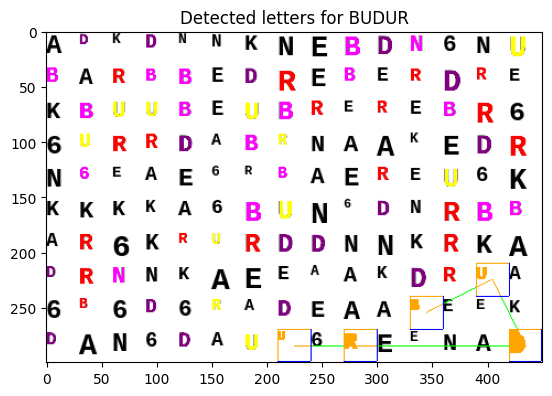

In [7]:
# Assuming `img` is generated using your provided image generation code
text1 = "BUDUR"
result1 = SearchInAlphabetSoup_Hu_Color(img, text1)

plt.imshow(cv.cvtColor(result1, cv.COLOR_BGR2RGB))
plt.title(f"Detected letters for {text1}")
plt.show()

In [ ]:
# #rrrrrrrrrrRRRRRRRRRRRRRRRR

#  [  2.99337424  , 7.37441974  ,11.49610793 , 11.15684756 ,-12. , 11.99959664 ,-12.        ]
#  [  2.99819389  , 7.18990667  ,11.37563441  ,11.15438167 , 12. , 11.99955274 ,-12.        ]
#  [  3.00293021  , 7.23328647  ,11.60703302  ,11.20708134 ,-12. , 11.99949215 ,-12.        ]
#  [  3.02180598  , 7.49264423  ,11.06654149  ,11.05402679 , 12. , 11.99981334 ,-12.        ]
#  [  2.95856174  , 7.2228826   ,11.19475844  ,11.13353714 ,-12. , 11.99933721 ,-12.        ]
#  [  3.02180598  , 7.49264423  ,11.06654149 , 11.05402679 , 12. , 11.99981334 ,-12.        ]
#  [  2.97116618  , 7.05089972  ,10.90547477 , 10.88396242 , 12.  ,11.99870308 ,-12.        ]
#  [  2.98172651  , 7.44007234 , 11.43527447 , 10.98473779 , 12. , 11.99947495 ,-12.        ]
#  [  2.97116618  , 7.05089972 , 10.90547477 , 10.88396242 , 12. , 11.99870308 ,-12.        ]
#  [  2.9861125  ,  7.22016021 , 11.15788965 , 11.20814166 , 12. , 11.99979985 ,-12. ]

# #bbbbbbbbbbbbbbbb
#  [  3.00640564  , 7.17381556 , 10.98021093 , 11.86583584 ,-12.  ,11.99996283 , 12.        ]
#  [  2.9731605   , 6.94182847 , 11.02548256 , 11.78251691 ,-12. , 11.99990488  ,12.        ]
#  [  2.99780934  , 7.01905498 , 11.07342144 , 11.90761205 ,-12. , 11.99996904 , 12.        ]
#  [  2.98469476  , 7.05281015 , 10.80878881 , 11.9772553  ,-12. ,-11.99999372 -12.        ]
#  [  2.99330435  , 7.01698556 , 10.82322186 , 11.75383154 , 12. , 11.9999893 , -12.        ]
#  [  2.99330435  , 7.01698556 , 10.82322186 , 11.75383154 , 12. , 11.9999893 , -12.        ]
#  [  3.0192444  ,  7.4303944  , 10.9420488  , 11.68960313 , 12. ,-11.99991294 , 12.        ]
#  [ 3.01209861 , 7.02534156 ,10.91654653 ,11.84651875 ,12.       ,  11.99998056 ,12.        ]
#  [  3.0041089  ,  7.20432312  ,10.91756631  ,11.84952106 ,-12. , 11.99996271 ,-12.        ]
#  [  2.98051719  , 7.22155248  ,10.93982636  ,11.49273447 ,-12. , 11.99996089 ,-12.  ]

# #uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu

#  [  2.9161667    7.31809027  10.24799455  10.8103928  -12.  11.99862494 -12.        ]
#  [  2.9161667    7.31809027  10.24799455  10.8103928  -12.  11.99862494 -12.        ]
#  [  2.9161667    7.31809027  10.24799455  10.8103928  -12.  11.99862494 -12.        ]
#  [  2.94840854   7.64026168  10.13563288  10.7562245  -12.  11.99964574  12.        ]
#  [ 2.93660685  7.30327783 10.27246636 10.68193869 12.         11.99970407 12.        ]
#  [  2.91076294   7.20722672  10.17176905  10.64430474 -12.  11.99766965 -12.        ]
#  [  2.93318599   7.03895723  10.39722718  10.80500237 -12.  11.99906914 -12.        ]
#  [  2.91076294   7.20722672  10.17176905  10.64430474 -12.  11.99766965 -12.        ]
#  [  2.91076294   7.20722672  10.17176905  10.64430474 -12.  11.99766965 -12.        ]
#  [  2.9497132    7.13331803  10.36393817  11.14940597 -12.  11.99928372 -12.  ]

# #dddddddddddddddddddddddddddd

#  [  2.9084599    6.96149022  10.0521984   11.30194296 -12. -11.99944716 -12.        ]
#  [  2.95753146   7.01708874  10.22160862  11.46446138 -12. -11.99970016  12.        ]
#  [  2.98530048   7.13249677  10.36855768  11.82979516  12. -11.99994343   0.        ]
#  [  2.98530048   7.13249677  10.36855768  11.82979516  12. -11.99994343   0.        ]
#  [  2.98530048   7.13249677  10.36855768  11.82979516  12. -11.99994343   0.        ]
#  [  2.94111029   7.12690735  10.19089953  11.87114148  12.  11.99998115 -12.        ]
#  [  2.92340801   6.86960773  10.131772    11.60386621 -12. -11.99976977 -12.        ]
#  [  2.92340801   6.86960773  10.131772    11.60386621 -12. -11.99976977 -12.        ]
#  [  2.98932668   7.20351484  10.30523049  11.88963167 -12. -11.99996856 -12.        ]
#  [  2.95644284   7.15427152  10.15573452  11.979795   -12.  11.99999951  12.   ]


# #kkkkkkkkkkkkkkkkk

#  [  2.97521928   7.14191947  10.33176639  10.6614037  -12. -11.99765613  12.        ]
#  [  2.97521928   7.14191947  10.33176639  10.6614037  -12. -11.99765613  12.        ]
#  [  2.97521928   7.14191947  10.33176639  10.6614037  -12. -11.99765613  12.        ]
#  [  3.00113588   7.34264773  10.59911877  10.58052349 -12. -11.99769337  12.        ]
#  [  2.95769602   7.10405808  10.02161954  10.56740793 -12. -11.99702514  12.        ]
#  [  2.97171965   6.99304696  10.26616856  10.73675528 -12. -11.99764933  12.        ]
#  [  3.00113588   7.34264773  10.59911877  10.58052349 -12. -11.99769337  12.        ]
#  [  2.96010755   6.94906786  10.11911532  10.62768259 -12. -11.99672589  12.        ]
#  [  2.95623471   7.13358849  10.4803107   10.51900689 -12. -11.99672277  12.        ]
#  [  3.00476809   7.08902742  10.60881822  10.79691926 -12. -11.99817015  12. ]

#  #aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


# : [  2.96356354  , 7.27730944  , 9.15974507 , 11.1055351  ,-12. , 11.99932451 , 12.        ]
#  [  2.96356354 ,  7.27730944  , 9.15974507 , 11.1055351 , -12. , 11.99932451 , 12.        ]
#  [  2.96766208 ,  7.25726     , 9.20516206 , 11.23301135 ,-12. , 11.99950535 , 12.        ]
#  [  2.9619816  ,  7.26473138  , 9.18647435 , 11.16697955 ,-12. , 11.99941747 , 12.        ]
#  [  2.94737101  , 7.17711621  , 9.20230938 , 10.79720977 ,-12. , 11.99833304 , 12.        ]
#  [  2.94737101  , 7.17711621  , 9.20230938  ,10.79720977 ,-12. , 11.99833304 , 12.        ]
#  [  2.94737101 ,  7.17711621  , 9.20230938 , 10.79720977 ,-12. , 11.99833304 , 12.        ]
#  [  2.9987038  ,  7.36524797  , 9.28425017 , 11.46253624 ,-12. , 11.99977935 ,-12.        ]
#  [ 2.99393918 , 7.37770734 , 9.23595474, 11.01256409 ,12.    ,     11.99947822 ,12.        ]
#  [  2.96838801  , 7.16479765   ,9.23708667  ,11.0499672  ,-12. , 11.9991497  , 12. ]

# # eeeeeeeeeeeeeeeeeeeeeeeeee

#  [  2.90148216  , 6.61715167  ,10.23203413  ,10.33271991 ,-12., -11.9913422  , 12.        ]
#  [  2.88360097  , 6.53789444 , 10.18117267 , 10.4470292  ,-12., -11.99202422 , 12.        ]
#  [  2.88360097  , 6.53789444 , 10.18117267 , 10.4470292  ,-12. ,-11.99202422 , 12.        ]
#  [  2.92161068  , 6.70722686  ,10.37386024  ,10.218256   ,-12. ,-11.98870168 , 12.        ]
#  [  2.92161068  , 6.70722686  ,10.37386024 , 10.218256   ,-12., -11.98870168 , 12.        ]
#  [  2.94198556  , 6.61182409 , 10.50385861  ,10.7712946  ,-12., -11.99664396 , 12.        ]
#  [  2.91151497  , 6.52036571 , 10.38315578 , 10.60248756 ,-12., -11.99516884 , 12.        ]
#  [  2.9662122   , 6.80777323 , 10.6748405  , 10.55992069 ,-12. ,-11.99656509 , 12.        ]
#  [  2.9662122   , 6.80777323 , 10.6748405  , 10.55992069 ,-12., -11.99656509 , 12.        ]
#  [  2.89595023  , 6.58100526 , 10.28892046  ,10.28788065 ,-12. ,-11.99076072 , 12.  ]

#  #6666666666666666

#   [  3.00662985  , 7.03678979 , 10.88341013 , 11.63884984 ,-12. ,-11.99983661 , 12.        ]
#  [  2.96963463  , 6.87361438 , 10.62602114 , 11.37079219, -12. ,-11.99965396 ,-12.        ]
#  [  2.98219027  , 6.93772886 , 10.71097202 , 11.41980857 ,-12. ,-11.99963856 ,-12.        ]
#  [  2.96963463  , 6.87361438 , 10.62602114  ,11.37079219 ,-12., -11.99965396 ,-12.        ]
#  [  2.98225369  , 6.91208366 , 10.55408089  ,11.20067104 ,-12., -11.99963034 ,-12.        ]
#  [  2.98225369  , 6.91208366 , 10.55408089 , 11.20067104 ,-12., -11.99963034 ,-12.        ]
#  [  2.96963463  , 6.87361438 , 10.62602114 , 11.37079219 ,-12., -11.99965396 ,-12.        ]
#  [  2.98596906  , 6.89468478 , 10.4988344   ,11.30320345 ,-12., -11.99969131 ,-12.        ]
#  [  2.98596906  , 6.89468478 , 10.4988344  , 11.30320345, -12., -11.99969131 ,-12.        ]
#  [  2.98001227  , 6.88787796 , 10.74909433 , 11.50636062 ,-12., -11.99967838 , 12.    ]

#  # nnnnnnnnnnnnnnnnnnnnnnn

#   [  2.98702975  , 7.16447196 , 11.99742085 , 11.99116862  ,12., -11.99999935 , 12.        ]
#  [ 2.99121239 , 7.33051856, 11.96198954 ,11.84624536 ,12.     ,    11.99998375 ,12.        ]
#  [  2.98702975 ,  7.16447196  ,11.99742085  ,11.99116862 , 12., -11.99999935 , 12.        ]
#  [  2.98702975 ,  7.16447196  ,11.99742085 , 11.99116862  ,12. ,-11.99999935 , 12.        ]
#  [  2.9972662  ,  7.15292041  ,11.29029402 , 11.58826937 ,-12., -11.99984397 , 12.        ]
#  [3.01294821  , 7.30971082 , 11.98604284  ,11.64804209 ,-12. , 11.99990164  ,12.
#  [  3.01294821  , 7.30971082 , 11.98604284 , 11.64804209 ,-12.,  11.99990164 , 12.        ]
#  [  3.00836829  , 7.46660531  ,11.97909214 , 11.74086408 , 12. , 11.99993908 ,-12.        ]
#  [  3.00836829  , 7.46660531  ,11.97909214  ,11.74086408 , 12. , 11.99993908 ,-12.        ]
#  [  3.01294821  , 7.30971082 , 11.98604284  ,11.64804209 ,-12.  ,11.99990164 , 12. ]